In [14]:
import numpy as np
import matplotlib.pyplot as plt

import pylab as plt
from pylab import rcParams
plt.style.use('seaborn-whitegrid')
plt.rcParams['font.family'] = 'serif'

COLORS = ['#A4A6BA', '#D9AE9E', '#628793']

In [15]:
harmonics = 2
forecast_size = 24
backcast_size = 168

frequency = np.append(np.zeros(1, dtype=np.float32),
                                np.arange(harmonics, harmonics / 2 * forecast_size,
                                            dtype=np.float32) / harmonics)[None, :]
backcast_grid = -2 * np.pi * (
        np.arange(backcast_size, dtype=np.float32)[:, None] / forecast_size) * frequency
forecast_grid = 2 * np.pi * (
        np.arange(forecast_size, dtype=np.float32)[:, None] / forecast_size) * frequency

backcast_cos = np.transpose(np.cos(backcast_grid))
forecast_cos = np.transpose(np.cos(forecast_grid))

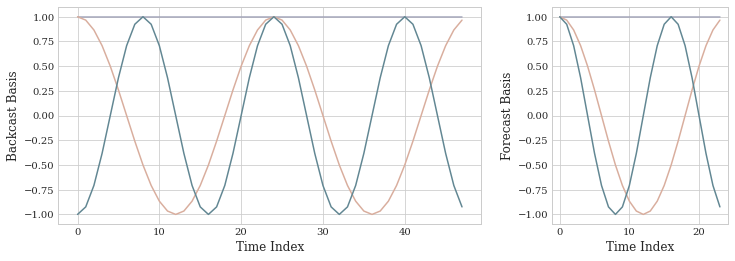

In [16]:
fig = plt.figure(figsize=(12, 4))

grid = plt.GridSpec(1, 3, wspace=0.4, hspace=0.6)

backcast_plot = fig.add_subplot(grid[0, :2])
forecast_plot = fig.add_subplot(grid[0, 2])

for idx in range(3):
    backcast_plot.plot(backcast_cos[idx, -48:], color=COLORS[idx])
    forecast_plot.plot(forecast_cos[idx, :], color=COLORS[idx])

backcast_plot.set_ylabel('Backcast Basis', fontsize=12)
forecast_plot.set_ylabel('Forecast Basis', fontsize=12)
backcast_plot.set_xlabel('Time Index', fontsize=12)
forecast_plot.set_xlabel('Time Index', fontsize=12)

plt.savefig('harmonic_basis.pdf', bbox_inches='tight')
plt.show()
plt.close()

In [17]:
polynomial_size = 3

backcast_trend = np.concatenate([np.power(np.arange(backcast_size, dtype=float) / backcast_size, i)[None, :]
                            for i in range(polynomial_size)])
forecast_trend = np.concatenate([np.power(np.arange(forecast_size, dtype=float) / forecast_size, i)[None, :]
                            for i in range(polynomial_size)])

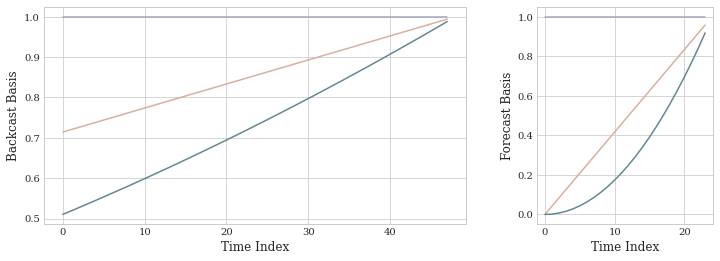

In [19]:
fig = plt.figure(figsize=(12, 4))

grid = plt.GridSpec(1, 3, wspace=0.4, hspace=0.6)

backcast_plot = fig.add_subplot(grid[0, :2])
forecast_plot = fig.add_subplot(grid[0, 2])

for idx in range(3):
    backcast_plot.plot(backcast_trend[idx, -48:], color=COLORS[idx])
    forecast_plot.plot(forecast_trend[idx, :], color=COLORS[idx])

backcast_plot.set_ylabel('Backcast Basis', fontsize=12)
forecast_plot.set_ylabel('Forecast Basis', fontsize=12)
backcast_plot.set_xlabel('Time Index', fontsize=12)
forecast_plot.set_xlabel('Time Index', fontsize=12)

plt.savefig('trend_basis.pdf', bbox_inches='tight')
plt.show()
plt.close()